# Veriyi Yükleme

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir=r"C:Tensorflow\f1"

train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.1)

test_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.1)

train_datagen=train_datagen.flow_from_directory(base_dir,target_size=(500,500),subset="training",batch_size=2)

test_datagen=test_datagen.flow_from_directory(base_dir,target_size=(500,500),subset="validation",batch_size=2)

Found 252 images belonging to 4 classes.
Found 28 images belonging to 4 classes.


In [3]:
train_datagen.class_indices

{'ferrari': 0, 'mclaren': 1, 'mercedes': 2, 'redbull': 3}

# Görselleştirme

(2, 500, 500, 3)
[0. 0. 0. 1.]


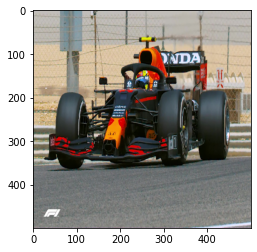

(2, 500, 500, 3)
[0. 0. 0. 1.]


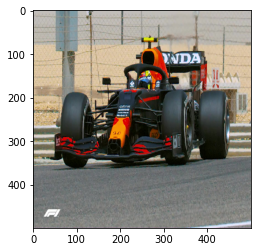

(2, 500, 500, 3)
[1. 0. 0. 0.]


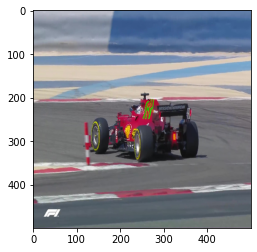

(2, 500, 500, 3)
[0. 1. 0. 0.]


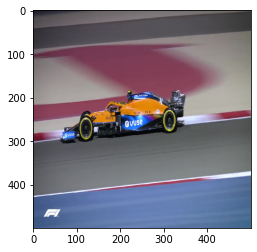

(2, 500, 500, 3)
[0. 1. 0. 0.]


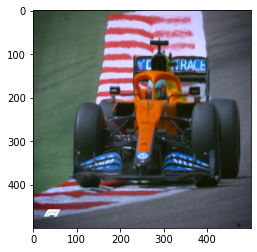

In [2]:
import matplotlib.pyplot as plt

for _ in range(5):
    img,label=test_datagen.next()
    print(img.shape)
    plt.imshow(img[0])
    print(label[0])
    plt.show()

# Kütüphaneler

In [5]:
import tensorflow as tf
import numpy as np
import pylab as pl
from keras import backend as K
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from tensorflow.keras import layers,activations

# Model Oluşumu

In [6]:
model=Sequential()

In [9]:
model=Sequential()

model.add(layers.Conv2D(filters=4,activation="elu",kernel_size=(5,5),input_shape=(500,500,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=8,activation="elu",kernel_size=(3,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=16,activation="elu",kernel_size=(2,2)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=32,activation="elu",kernel_size=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(50,activation="elu"))
model.add(layers.Dense(100,activation="elu"))
model.add(layers.Dense(100,activation="elu"))
model.add(layers.Dense(50,activation="elu"))
model.add(layers.Dense(4,activation="softmax"))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 496, 496, 4)       304       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 248, 248, 4)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 246, 246, 8)       296       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 123, 123, 8)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 122, 122, 16)      528       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 61, 61, 16)      

# Model Eğitimi

In [11]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
loss=tf.keras.losses.CategoricalCrossentropy()

In [12]:
model.compile(optimizer=optimizer,loss=loss,metrics=["mse","accuracy"])

In [13]:
result=model.fit(train_datagen,epochs=5,verbose=1,validation_data=test_datagen)

Epoch 1/5
126/126 [==============================] - 57s 447ms/step - loss: 1.3360 - mse: 0.1669 - accuracy: 0.4960 - val_loss: 1.9313 - val_mse: 0.1756 - val_accuracy: 0.4643
Epoch 2/5
126/126 [==============================] - 57s 454ms/step - loss: 1.1941 - mse: 0.1360 - accuracy: 0.6190 - val_loss: 1.2640 - val_mse: 0.1730 - val_accuracy: 0.5357
Epoch 3/5
126/126 [==============================] - 58s 461ms/step - loss: 0.4553 - mse: 0.0616 - accuracy: 0.8294 - val_loss: 1.2648 - val_mse: 0.1682 - val_accuracy: 0.5357
Epoch 4/5
126/126 [==============================] - 58s 457ms/step - loss: 0.5800 - mse: 0.0768 - accuracy: 0.8016 - val_loss: 2.6755 - val_mse: 0.1999 - val_accuracy: 0.5714
Epoch 5/5
126/126 [==============================] - 58s 463ms/step - loss: 0.3769 - mse: 0.0453 - accuracy: 0.8770 - val_loss: 1.6263 - val_mse: 0.1920 - val_accuracy: 0.4643


In [14]:
result.history

{'loss': [1.3359813690185547,
  1.194126844406128,
  0.45534247159957886,
  0.5799927711486816,
  0.37688180804252625],
 'mse': [0.16689303517341614,
  0.1359584778547287,
  0.061561111360788345,
  0.07675418257713318,
  0.045285552740097046],
 'accuracy': [0.4960317313671112,
  0.6190476417541504,
  0.829365074634552,
  0.8015872836112976,
  0.8769841194152832],
 'val_loss': [1.9313405752182007,
  1.264018177986145,
  1.2647504806518555,
  2.6755177974700928,
  1.6263006925582886],
 'val_mse': [0.1756363958120346,
  0.17297089099884033,
  0.1681824028491974,
  0.19988884031772614,
  0.19200873374938965],
 'val_accuracy': [0.4642857015132904,
  0.5357142686843872,
  0.5357142686843872,
  0.5714285969734192,
  0.4642857015132904]}

In [15]:
acc=result.history["accuracy"]
val_acc=result.history["val_accuracy"]
acc_loss=result.history["loss"]
val_loss=result.history["val_loss"]

In [16]:
epoch=range(1,len(acc)+1)

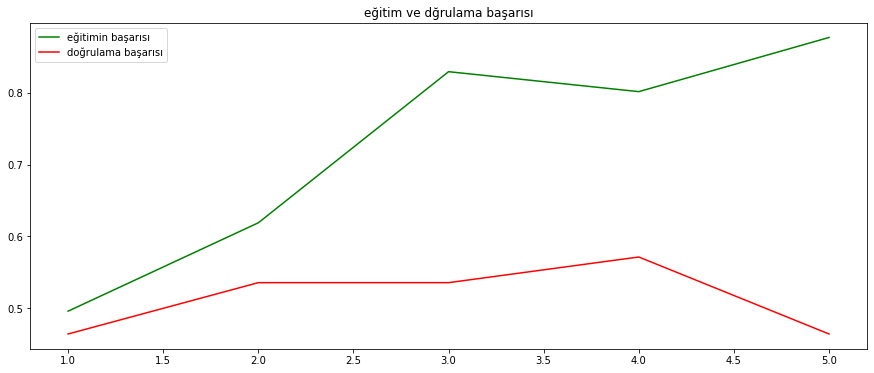

In [17]:
plt.figure(figsize=(15,6))
plt.plot(epoch,acc,label=("eğitimin başarısı"),color="g")
plt.plot(epoch,val_acc,label=("doğrulama başarısı"),color="r")
plt.title("eğitim ve dğrulama başarısı")
plt.legend()

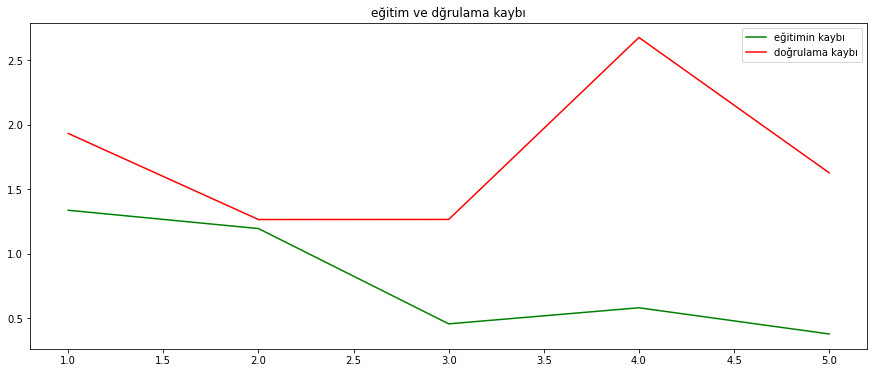

In [18]:
plt.figure(figsize=(15,6))
plt.plot(epoch,acc_loss,label=("eğitimin kaybı"),color="g")
plt.plot(epoch,val_loss,label=("doğrulama kaybı"),color="r")
plt.title("eğitim ve dğrulama kaybı")
plt.legend()